#### Amazinum. Task 11. Clustering. Moisei

Task:
- Agglomerative clustering using complete linkage
- Agglomerative clustering using single linkage
- DBSCAN
- Use albow method to determine the best k for Kmeans

Hierarchical (agglomerative) clustering при відображенні clustering steps показує лише 3 кольори з 5. Можливо це через вибір кластерів. Вибрано було 5, а оптимально, судячи з графіку, 2.

#### Load dataset

<IPython.core.display.Javascript object>


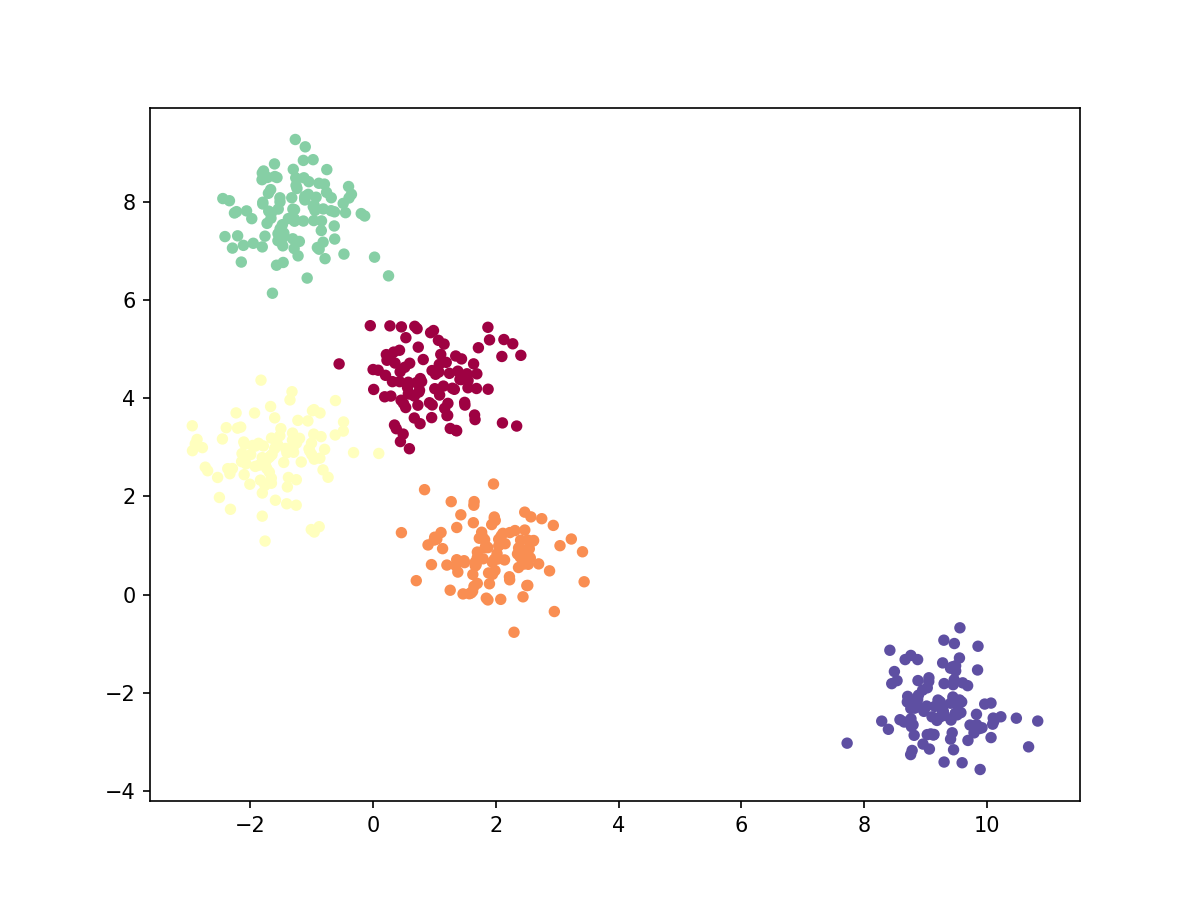

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])  

def plot_points(closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(X[:,0], X[:,1])
    else:
        plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    

#### Sklearn kmeans

<IPython.core.display.Javascript object>


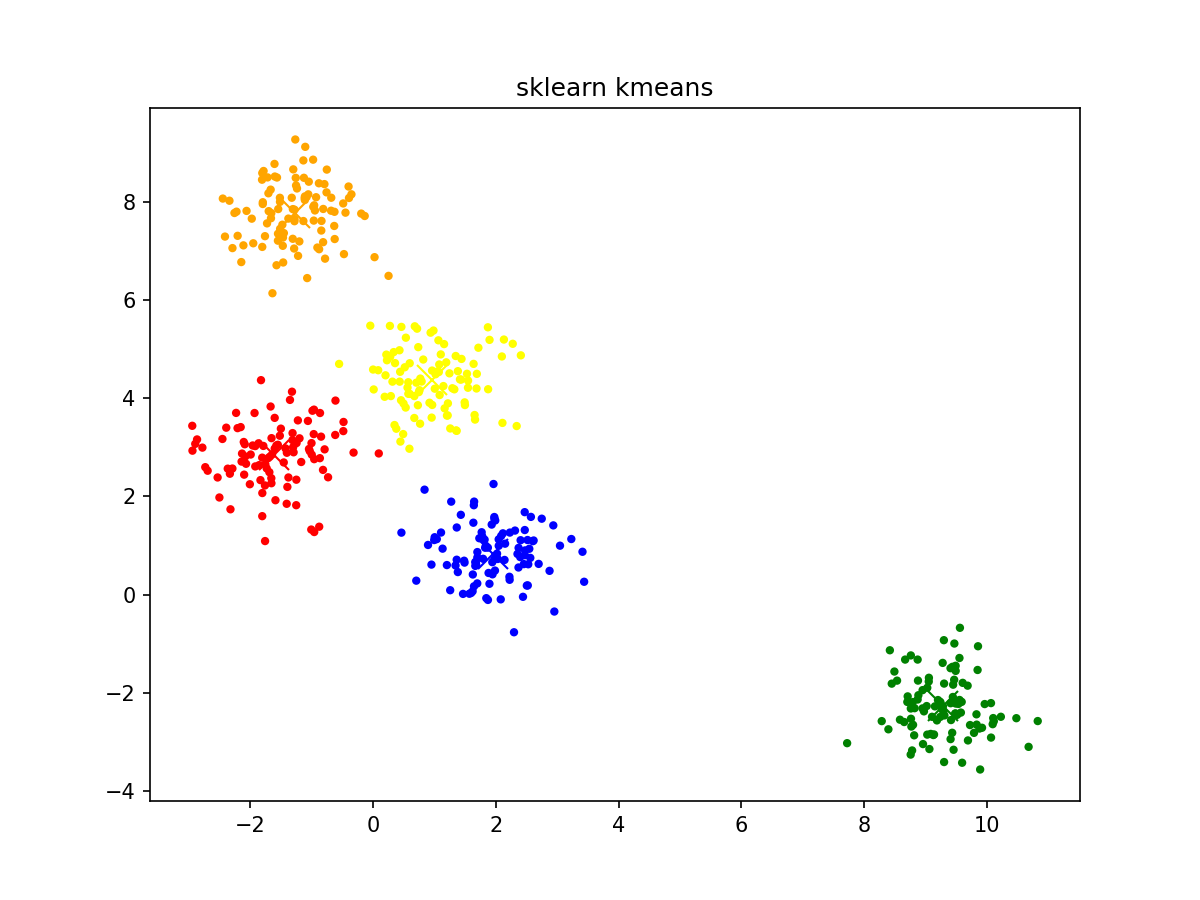

Text(0.5, 1.0, 'sklearn kmeans')

In [15]:
from sklearn.cluster import KMeans

points = np.array(list((zip(X[:,0], X[:,1]))))

clf = KMeans(n_clusters=5) # n_init : int, default: 10  - Number of time the k-means algorithm will be run with different centroid seeds.
clf.fit(points)
predicted= clf.predict(points)

plt.figure(figsize=(8,6))
colors=  np.array(['green', 'red', 'orange', 'blue', 'yellow'])

# draw samples 
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')

# draw centroids 
for i, c in enumerate (clf.cluster_centers_):    
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    
plt.title ('sklearn kmeans')

#### Review cost function

Init centroids

[[-1.6  3. ]
 [-1.2  7.8]
 [ 1.   4.2]
 [ 2.   0.8]
 [ 9.2 -2.2]]


<IPython.core.display.Javascript object>


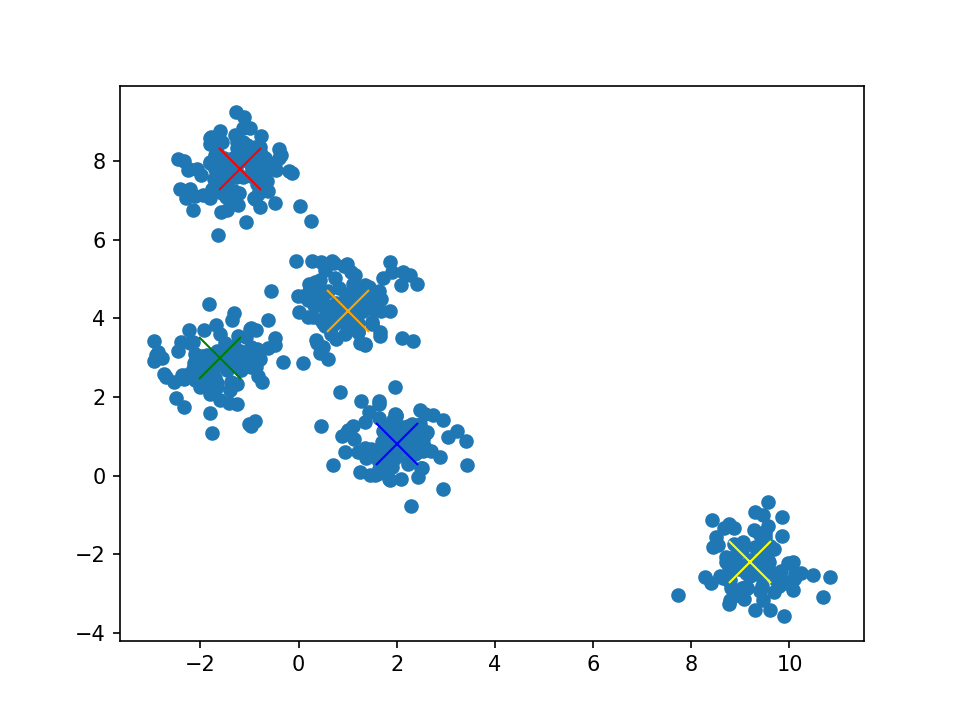

In [32]:
def init_centroids(amount, is_random = True, points = None, seed = 10): 
    if is_random:
        np.random.seed = (seed) 
        return points [np.random.choice(len(points), amount)]        
    else:
        centroids = np.array ([(-1.6,3), (-1.2,7.8), (1,4.2), (2,0.8), (9.2,-2.2)])
        return centroids[:amount]

# centroids = init_centroids(2, is_random= False)
centroids = init_centroids(5, is_random= False)
print (centroids)

def plot_centroids(centroids):
    for i, c in enumerate (centroids):
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=20) 

def draw_state(centroids = None, closest_centroids = None):        
    plt.figure ()
    plot_points(closest_centroids)
    plot_centroids(centroids)

draw_state(centroids = centroids, closest_centroids=None)

Compute distances from samples to centroids

In [33]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  

compute_distances(points, centroids)

array([[ 5.05984318,  2.33333966,  4.12281023, ...,  1.1975428 ,
         0.44743206,  4.42130866],
       [ 8.64859687,  3.78110205,  4.05227705, ...,  5.48651115,
         5.20643741,  4.64612575],
       [ 4.48272079,  0.69952718,  1.33181172, ...,  4.06090693,
         3.25950044,  1.55782351],
       [ 0.95301766,  3.91671361,  4.38663708, ...,  5.00361661,
         4.27372442,  4.09068825],
       [ 7.09407436, 11.03062766, 10.38717954, ..., 12.800737  ,
        12.07039235,  9.8055046 ]])

Compute Cost

In [34]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)


closest_centroids= np.zeros(len(points), dtype=int) # compute for case of all samples assigned to first centroid
print ('Cost= {}'.format(J(centroids, closest_centroids)))

Cost= 4.970471187033835


Step 1 of iteration: compute closest centroids

closest_centroids:
 [3 2 2 0 2 4 2 4 3 3 1 0 2 1 0 4 0 4 2 0 3 4 0 0 3 1 3 3 1 0 3 2 2 1 2 3 3
 4 4 4 1 4 0 0 2 2 4 2 3 1 2 4 3 3 4 2 4 4 1 0 3 4 3 0 2 1 0 1 2 2 2 3 0 4
 2 0 3 3 0 3 0 1 2 2 4 3 4 2 2 0 0 1 1 0 4 3 3 0 1 2 3 1 1 3 1 0 4 3 3 2 2
 0 3 4 4 1 1 1 3 4 4 0 2 1 0 2 4 0 1 1 1 3 2 4 1 4 4 4 2 0 3 1 3 0 3 4 4 1
 3 2 2 1 1 3 0 2 2 2 1 0 1 4 0 2 3 3 0 3 4 3 0 2 4 4 3 1 0 1 2 1 2 1 1 4 0
 4 3 2 1 4 1 3 4 0 3 0 0 4 1 1 3 1 2 1 1 3 4 0 0 2 4 1 2 1 4 1 4 3 3 2 3 0
 4 4 4 2 0 4 4 0 3 0 2 1 1 0 1 0 4 2 3 2 1 4 3 3 1 1 3 4 4 2 3 3 2 2 0 2 0
 1 4 0 1 3 2 0 4 3 0 2 2 1 0 3 1 3 1 3 1 1 0 3 3 3 2 3 1 0 1 4 0 2 2 2 3 4
 1 0 4 1 4 2 3 3 1 2 4 3 3 1 4 1 2 4 2 0 2 4 4 4 1 1 2 3 2 1 4 4 3 3 1 0 3
 2 2 0 0 1 3 4 0 2 0 4 3 3 3 1 2 0 0 3 0 2 3 3 0 2 2 4 0 2 4 2 0 3 0 3 1 1
 3 0 4 2 3 3 4 2 1 2 4 4 2 4 4 1 1 4 0 1 1 1 0 4 4 4 4 3 1 3 2 0 4 3 3 2 0
 2 0 1 4 2 4 1 2 0 4 1 2 3 4 0 1 2 3 2 0 1 3 2 0 4 1 3 1 3 2 1 3 1 3 4 2 2
 1 3 3 2 2 0 2 0 4 0 0 3 4 0 1 0 4 1 2 4 0 0 1 0 0 2 4 0 1 3 2 0 1 4 2 4 0
 4 3 

<IPython.core.display.Javascript object>


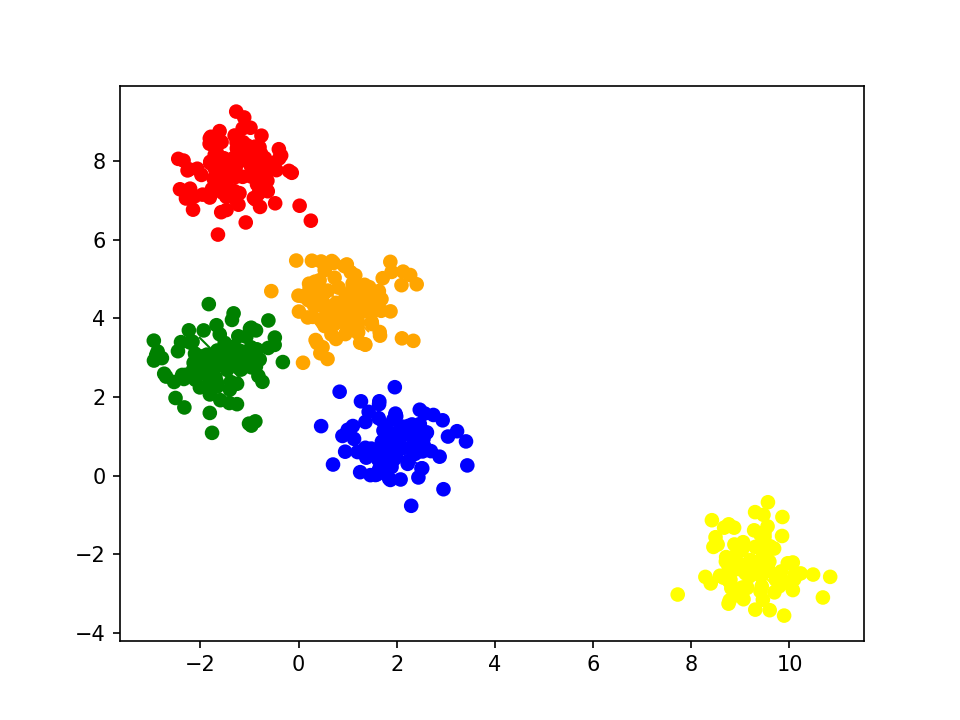

In [35]:
def compute_closest_centroids(centroids):       
    all_distances = compute_distances(points, centroids) #np.array([np.apply_along_axis(np.linalg.norm,1,points-c) for c in centroids])
    closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids) 
print ('closest_centroids:\n',closest_centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

Step 2 of iteration: compute means

New centroids: [array([-0.34298522,  3.6092719 ]), array([-1.27978967,  7.75768153]), array([1.95764171, 0.86090238]), array([ 9.29102368, -2.27528389])]
Cost= 1.0740825172168524


<IPython.core.display.Javascript object>


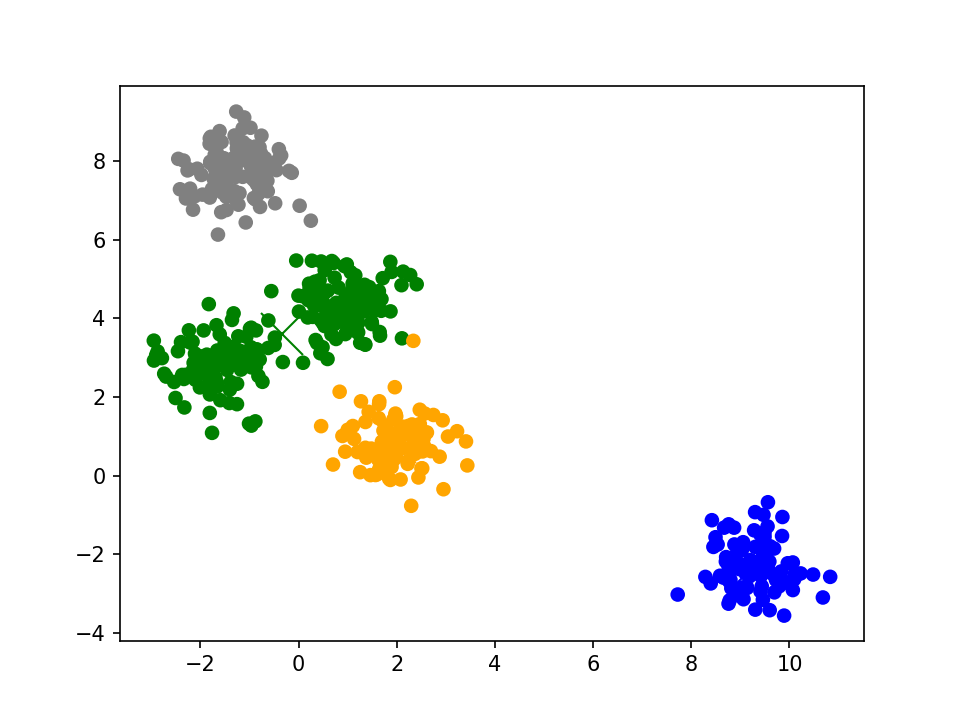

In [90]:
def compute_means(centroids, closest_centroids):     # need to consider all centroids in case of no assigned points to some centroid  
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids: # no assigned point assigned to this centroid 
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
print ('New centroids:',centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

Якщо вибирати amount 5, то графік не виводиться. Виводиться при 2, 3, 4. Тобто, оптимальне число К=2. Число 5 вже забагато.

<IPython.core.display.Javascript object>


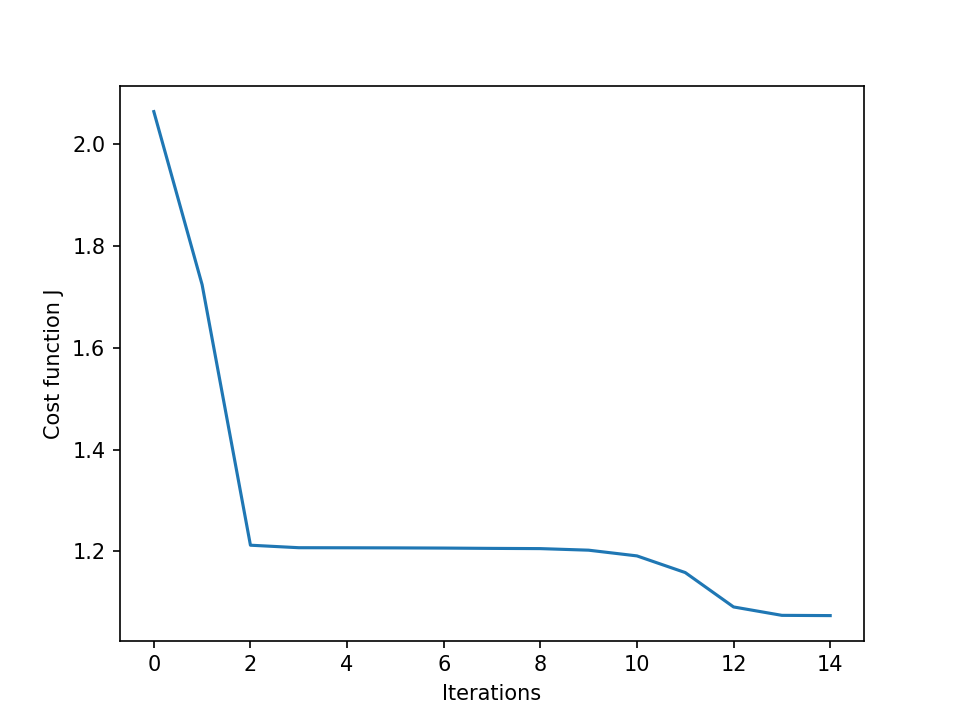

Text(0, 0.5, 'Cost function J')

In [38]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids))         

    return centroids, closest_centroids, J_hist

centroids= init_centroids(amount = 4, points= points, is_random=False, seed= None )
centroids, closest_centroids, J_hist = run_k_means(centroids)
plt.figure ()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')


#### Hierarchical (agglomerative) clustering

Cache all distances

In [39]:
def calc_all_distances(points):
    all_distances = {}
    for i in range(len(points)):
        for j in range(i + 1):
            key_distance = '{}_{}'.format(i, j)
            reverse_key_distance = '{}_{}'.format(j, i)
            all_distances[key_distance] = all_distances[reverse_key_distance] = np.linalg.norm(points[i]-points[j])
    return all_distances

test_points = np.array([[0,0], [1,1], [2,2], [4,4], [6,6], [8,8]])
print(test_points)
calc_all_distances(test_points)

[[0 0]
 [1 1]
 [2 2]
 [4 4]
 [6 6]
 [8 8]]


{'0_0': 0.0,
 '1_0': 1.4142135623730951,
 '0_1': 1.4142135623730951,
 '1_1': 0.0,
 '2_0': 2.8284271247461903,
 '0_2': 2.8284271247461903,
 '2_1': 1.4142135623730951,
 '1_2': 1.4142135623730951,
 '2_2': 0.0,
 '3_0': 5.656854249492381,
 '0_3': 5.656854249492381,
 '3_1': 4.242640687119285,
 '1_3': 4.242640687119285,
 '3_2': 2.8284271247461903,
 '2_3': 2.8284271247461903,
 '3_3': 0.0,
 '4_0': 8.48528137423857,
 '0_4': 8.48528137423857,
 '4_1': 7.0710678118654755,
 '1_4': 7.0710678118654755,
 '4_2': 5.656854249492381,
 '2_4': 5.656854249492381,
 '4_3': 2.8284271247461903,
 '3_4': 2.8284271247461903,
 '4_4': 0.0,
 '5_0': 11.313708498984761,
 '0_5': 11.313708498984761,
 '5_1': 9.899494936611665,
 '1_5': 9.899494936611665,
 '5_2': 8.48528137423857,
 '2_5': 8.48528137423857,
 '5_3': 5.656854249492381,
 '3_5': 5.656854249492381,
 '5_4': 2.8284271247461903,
 '4_5': 2.8284271247461903,
 '5_5': 0.0}

In [48]:
# implement single distance  between 2 clusters 
def calc_min_distance_of_two_clusters(cluster_a, cluster_b, all_distances):
    '''
    :param cluster_a -  list e.g. [1,4,56]
    :param cluster_b -  list e.g. [2,34,78]
    :all_distances -  dict e.g.{'0_0': 0.0, '1_0': 0.5630650985836898, '0_1': 0.5630650985836898, '1_1': 0.0, '2_0': 0.9000430792627307, '0_2': 0.9000430792627307,
    :return - min distance between all pairs fo two clusters 
    '''
    return min([all_distances['{}_{}'.format(keyword_index_a,keyword_index_b)] for keyword_index_a in cluster_a for keyword_index_b in cluster_b])

# choose the closest clusters 
def compute_next_merge(clusters, all_distances):
    '''
    calculates candidates ( the closest by similarity clusters)
    :param resulted_clusters: dictionary like {3: [15,3,56,1]}
    :return: calculated score 
    '''
    labels= list(clusters.keys())
    # init score
    min_distance = calc_min_distance_of_two_clusters(clusters[labels[0]],clusters[labels[1]],all_distances )
    # init the canidates
    clusters_to_merge = [labels[0], labels[1]] 
    for i in range (len(labels)-1):
        for j in range(i+1,len(labels)):
            curr_min_distance= calc_min_distance_of_two_clusters(clusters[labels[i]],clusters[labels[j]], all_distances)
            if curr_min_distance < min_distance: 
                min_distance = curr_min_distance
                clusters_to_merge = [labels[i],labels[j]]
    return min_distance, clusters_to_merge

# merge two closest clusters 
def merge_clusters(current_clusters,clusters_to_merge):
    '''
    :param current_clusters: dict of pairs: label and cluster (list of indices of keywords) e.g. {1: [23,5,5]}
    :param clusters_to_merge: list of 2 labels of closest clusters - candidates to merge e.g. [34,57]
    :return:
    '''
    # replace the first component by merged cluster
    current_clusters[clusters_to_merge[0]] += current_clusters[clusters_to_merge[1]]
    # remove the second component from total list  
    del current_clusters[clusters_to_merge[1]]
    return current_clusters


# run clustering process 
def run_agglomerative_clustering(points, n_clusters=1):
    resulted_clusters={i: [i] for i in range(len(points))}    
    while len(resulted_clusters)>n_clusters:
        # determinethe closest clusters
        min_distance, clusters_to_merge=  compute_next_merge(resulted_clusters, all_distances)        
        
        # print progress
        if (len(resulted_clusters)) % 25 == 0:
            print ('len(clusters)= {:,} distance = {}'.format(len(resulted_clusters), min_distance))
        
        # merge 2 closest clusters         
        resulted_clusters= merge_clusters(resulted_clusters, clusters_to_merge)
    return resulted_clusters





Shuffle the points

In [49]:
points = np.array(list((zip(X[:,0], X[:,1]))))
print (points[:6])
np.random.shuffle(points) 
print ('\n shuffled:\n', points[:6])

[[ 2.4412562  -0.04471039]
 [ 0.31364007  4.33508638]
 [ 1.89593761  5.18540259]
 [-1.52172727  3.23408479]
 [ 0.3471383   3.45177657]
 [ 9.20439002 -2.14591888]]

 shuffled:
 [[-1.04990972  8.4050079 ]
 [ 1.48170052  0.69007459]
 [ 1.32222457  4.17880807]
 [-2.41567762  7.28778992]
 [-0.81807685  2.53874001]
 [-1.59319766  1.92146237]]


Cache all distances for target points

In [50]:
# cache all distances  
all_distances= calc_all_distances (points)
print ('len (points)= {:,}'.format(len (points)))
print ('len (all_distances)= {:,}'.format(len (all_distances)))

len (points)= 500
len (all_distances)= 250,000


Launch agglomerative clustering

In [51]:
n_clusters= 5
results = run_agglomerative_clustering(points, n_clusters=n_clusters)
print ('\nClustering complete.')

len(clusters)= 500 distance = 0.006352393069545862
len(clusters)= 475 distance = 0.0392925167783086
len(clusters)= 450 distance = 0.05158223742120575
len(clusters)= 425 distance = 0.0657803417028098
len(clusters)= 400 distance = 0.07958344006635855
len(clusters)= 375 distance = 0.08945203773903236
len(clusters)= 350 distance = 0.10150157844091252
len(clusters)= 325 distance = 0.11049627593693688
len(clusters)= 300 distance = 0.12198455077780257
len(clusters)= 275 distance = 0.13156218952635915
len(clusters)= 250 distance = 0.14189348962741719
len(clusters)= 225 distance = 0.15475863042110913
len(clusters)= 200 distance = 0.16794532385842964
len(clusters)= 175 distance = 0.1840464048440639
len(clusters)= 150 distance = 0.19879680425918292
len(clusters)= 125 distance = 0.21611551809936708
len(clusters)= 100 distance = 0.2341933637842238
len(clusters)= 75 distance = 0.259061815086084
len(clusters)= 50 distance = 0.29976631982011426
len(clusters)= 25 distance = 0.4098785607582141

Clusteri

Visualize results

In [52]:
# print structure of results 
for k, value in results.items():
    print ('index = {} (len = {:,}) : {}'.format(k, len(value), value[:10] ))
    
# enumerate the inices of clusters     
enumerated= {i: value[1] for i, value in enumerate(results.items())}
# create list of cluster indices 
predicted= [k for i in range(len(points)) for k, v in enumerated.items()  if i in v ]

# predicted= compute_current_clusters_indices(results, n_clusters)
print ('\nPredicted cluster indices for points:\n',predicted)

index = 0 (len = 100) : [0, 292, 381, 74, 183, 61, 287, 265, 411, 444]
index = 1 (len = 100) : [1, 312, 200, 261, 215, 58, 33, 357, 174, 481]
index = 2 (len = 200) : [2, 142, 13, 486, 386, 9, 328, 22, 153, 106]
index = 6 (len = 99) : [6, 44, 333, 477, 246, 318, 284, 105, 324, 384]
index = 334 (len = 1) : [334]

Predicted cluster indices for points:
 [0, 1, 2, 0, 2, 2, 3, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 3, 0, 2, 2, 2, 1, 3, 2, 0, 2, 2, 2, 1, 2, 1, 2, 3, 3, 1, 2, 2, 2, 1, 2, 3, 3, 3, 2, 2, 0, 0, 2, 2, 2, 1, 3, 2, 3, 2, 1, 1, 2, 0, 3, 0, 2, 2, 0, 3, 3, 2, 2, 1, 2, 2, 0, 2, 1, 3, 3, 1, 2, 2, 3, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 3, 0, 0, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 3, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 0, 2, 1, 2, 3, 0, 3, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 0, 1, 2, 3, 1, 1, 0, 1, 1, 0, 1, 2, 3, 2, 1, 2, 1, 0, 2, 3, 1, 2, 0, 1, 2, 3, 1, 0, 0, 2, 2, 2, 0, 0, 3, 3, 2, 1, 0, 3, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 3, 0, 2, 1, 2, 0, 0, 0, 2, 3, 0, 1,

<IPython.core.display.Javascript object>


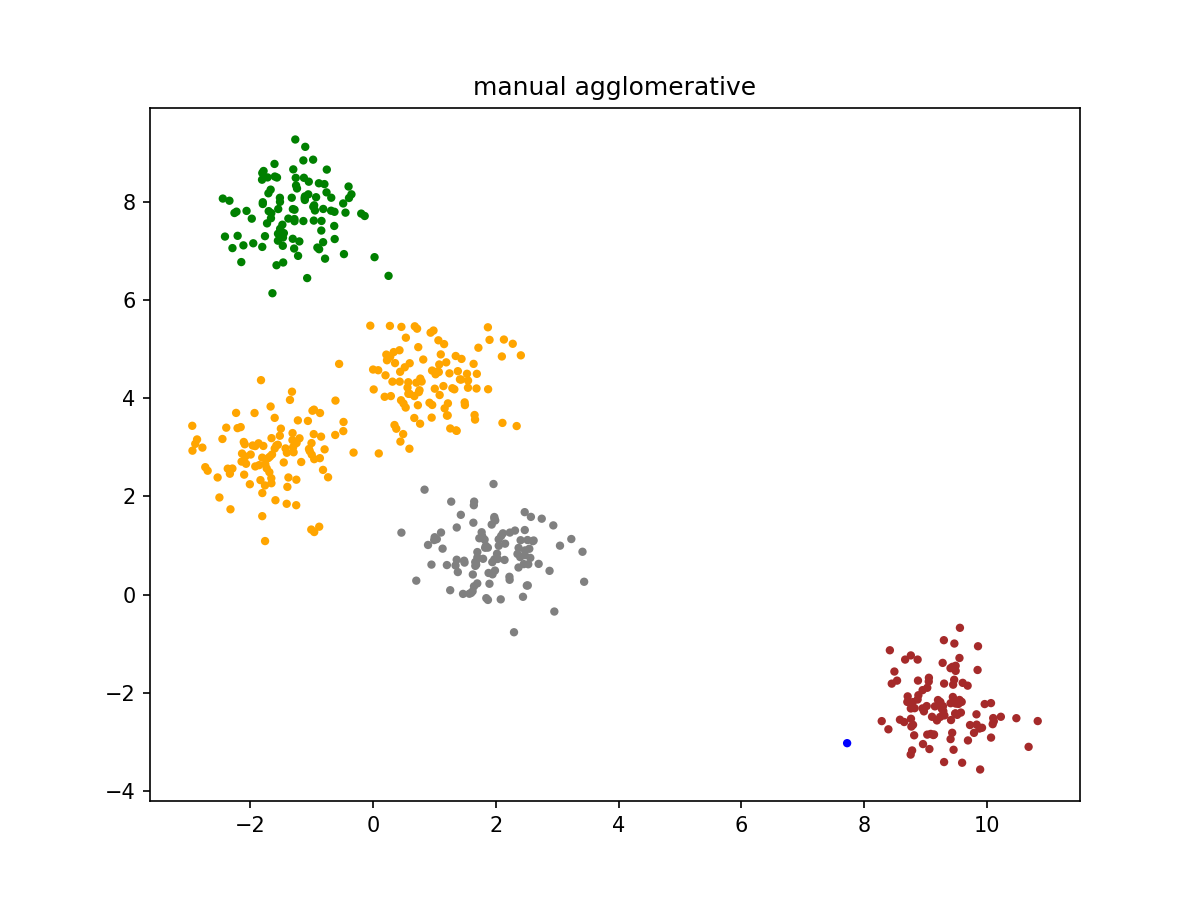

Text(0.5, 1.0, 'manual agglomerative')

In [58]:
plt.figure(figsize=(8,6))
colors=  np.array(['green', 'grey', 'orange', 'brown', 'blue', 'yellow'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('manual agglomerative')

#### Visualize process of merging

In [59]:
from matplotlib import animation
# from tqdm import tqdm # use for displaying progress 
from time import sleep 
from tqdm import trange # use for displaying progress 

Convert format of cluster objects to list of clusters indices

In [60]:
def compute_current_clusters_indices(curr_clusters, clusters_to_merge):
    ind_a, ind_b = clusters_to_merge
    predicted = []
    for i in range(len(points)): # index of point 
        for k, v in curr_clusters.items(): # k - index of cluster , v - list of indices of points 
            if i in v: # point pertains to this cluster 
                if k == ind_a:
                    predicted.append(2) # is going to be merged from cluster 1
                elif k == ind_b:
                    predicted.append(3) # is going to be merged from cluster 2
                elif len(v)>1: 
                    predicted.append(0) # merged at least once 
                else:
                    predicted.append(1) # never merged at least once 

    return predicted


Animate the clustering steps

Running some iterations w/o plotting...


100%|████████████████████████████████████████████████████████████████████████████████| 220/220 [00:29<00:00,  7.34it/s]


<IPython.core.display.Javascript object>


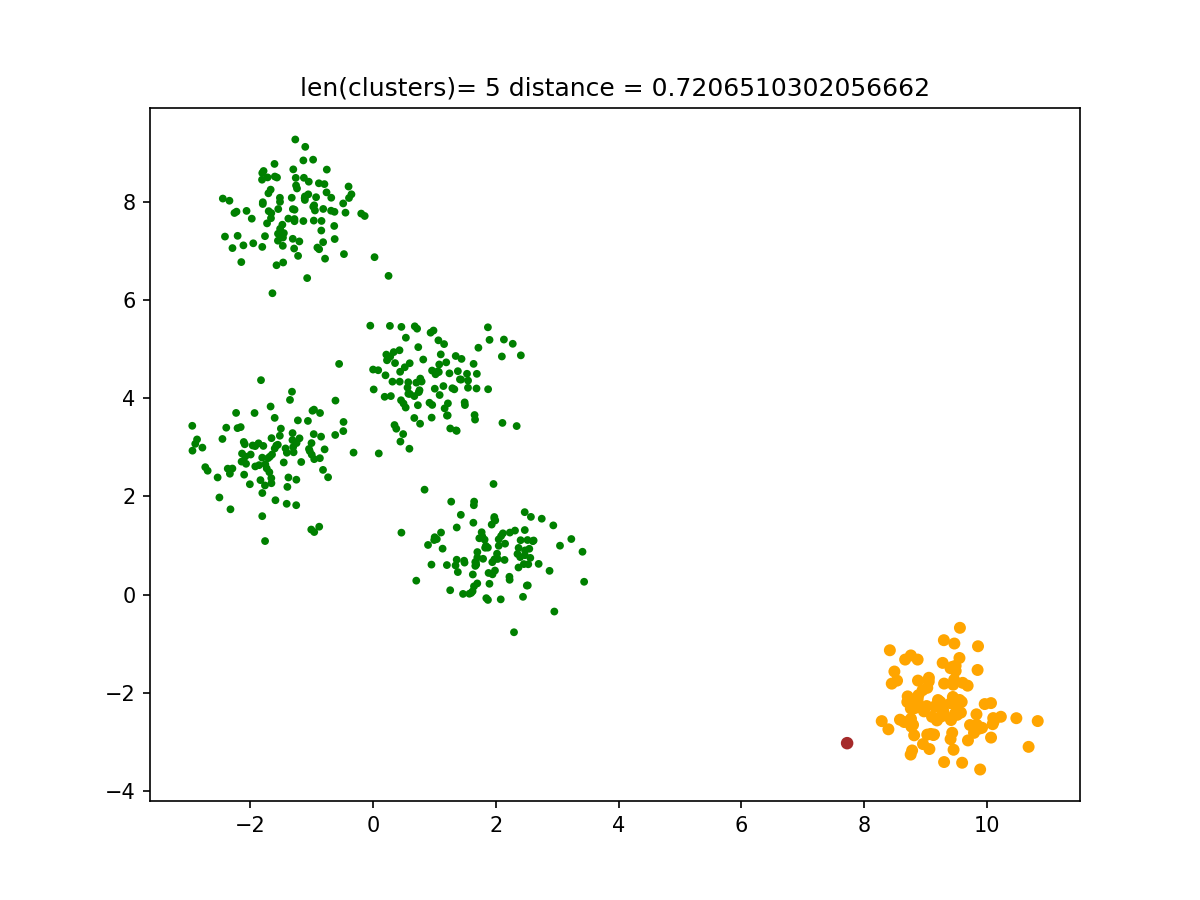

In [61]:
def update(curr): # note: does not notify about errors just does not work. ain't that b... ((
    ax.clear()
    colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
    sizes = np.array([30, 60, 90, 100, 300, 30])

    global points
    x1, x2 = np.array(list((zip(*points))))

    global resulted_clusters
    global all_distances
    global n_clusters

    if len(resulted_clusters)<= n_clusters:
        a.event_source.stop()
    
    # perfrom step of agglomerative clustering but plot the clusters to merge before merging      
    min_distance, clusters_to_merge=  compute_next_merge(resulted_clusters, all_distances)        
    curr_predicted= compute_current_clusters_indices(resulted_clusters, clusters_to_merge)#  first_cluster)
    plt.scatter(x1, x2, c= colors[curr_predicted], marker= '.', s= sizes[curr_predicted])       
    
    resulted_clusters= merge_clusters(resulted_clusters, clusters_to_merge)
    

    # ax.plot(np.random.rand(10)) # use to test annimation is working
    plt.title('len(clusters)= {:,} distance = {}'.format(len(resulted_clusters)+1, min_distance)) 

# init clusters - one per point  
resulted_clusters={i: [i] for i in range(len(points))}    

print ('Running some iterations w/o plotting...')
sleep(.5) # .5 seconds  - to avoid progress bar splitted to two 
for i in trange(220): # Running some iterations w/o plotting
    min_distance, clusters_to_merge=  compute_next_merge(resulted_clusters, all_distances)        
    resulted_clusters= merge_clusters(resulted_clusters, clusters_to_merge)

fig = plt.figure(figsize=(8,6))
ax = plt.gca()
a = animation.FuncAnimation(fig, update, interval=1000) # Note: you need to assign the result in order to be able to stop the animation 


#### Sklearn AgglomerativeClustering. Complete

<IPython.core.display.Javascript object>


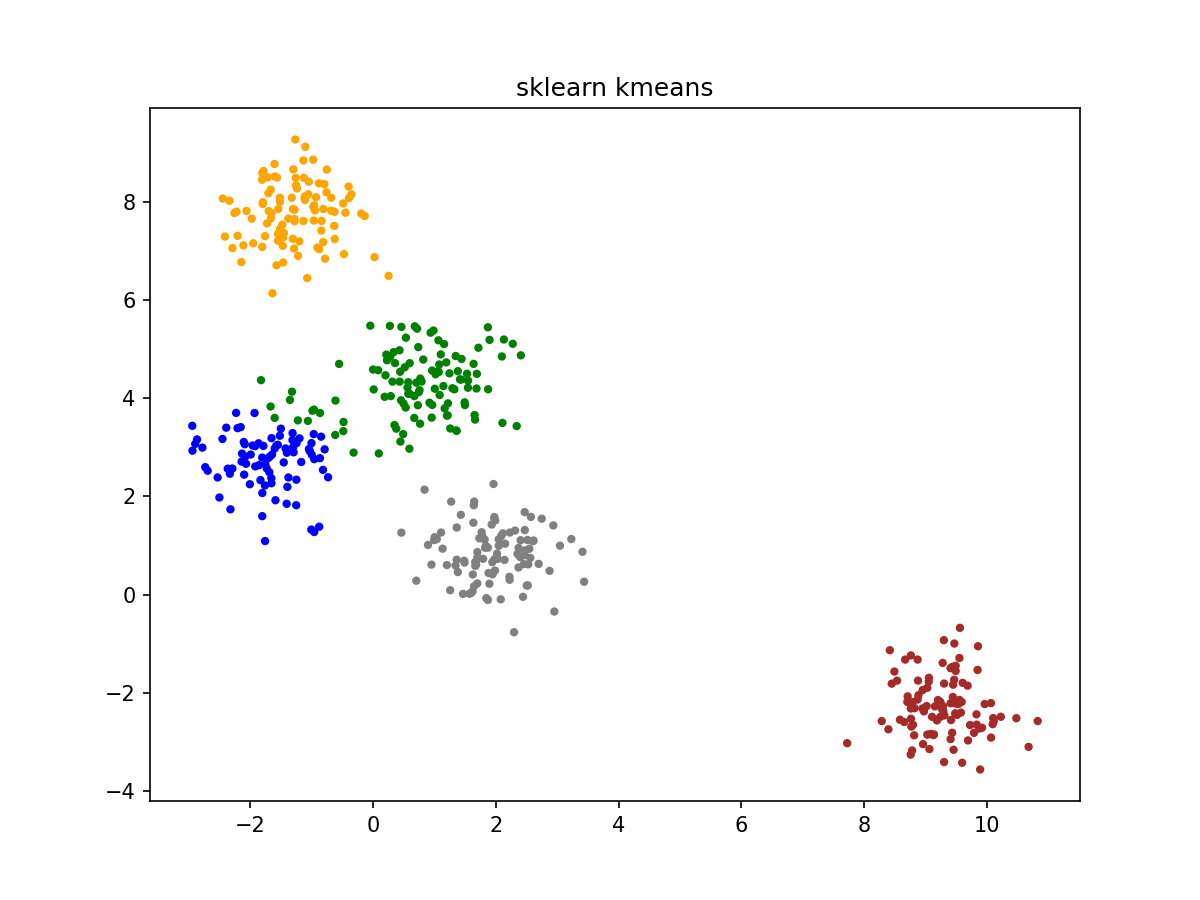

Text(0.5, 1.0, 'sklearn kmeans')

In [62]:
from sklearn.cluster import AgglomerativeClustering

points = np.array(list((zip(X[:,0], X[:,1]))))
clf = AgglomerativeClustering(n_clusters=5, linkage= 'complete')
predicted= clf.fit_predict(points)

plt.figure(figsize=(8,6))
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.') 
    
plt.title ('sklearn kmeans')

#### Sklearn AgglomerativeClustering. Single

<IPython.core.display.Javascript object>


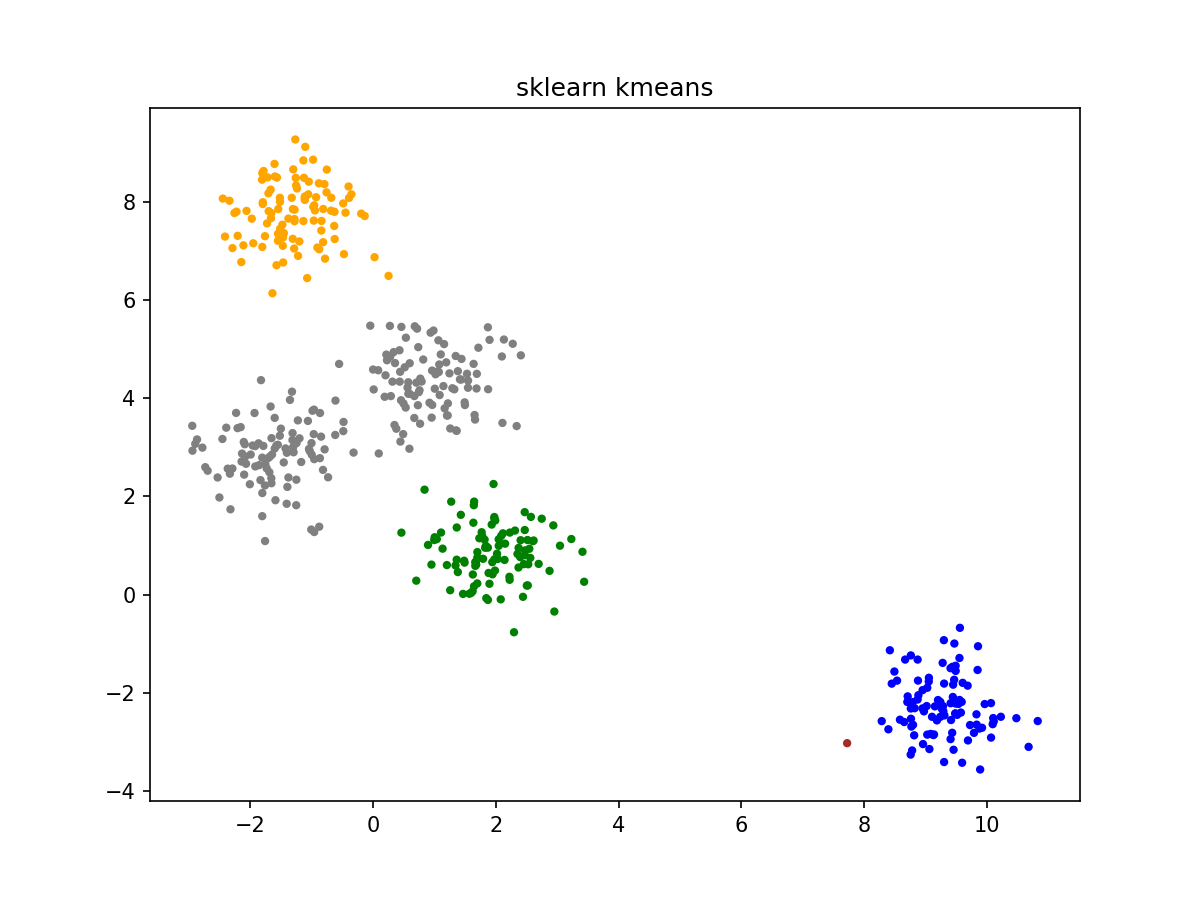

Text(0.5, 1.0, 'sklearn kmeans')

In [63]:
from sklearn.cluster import AgglomerativeClustering

points = np.array(list((zip(X[:,0], X[:,1]))))
clf = AgglomerativeClustering(n_clusters=5, linkage= 'single')
predicted= clf.fit_predict(points)

plt.figure(figsize=(8,6))
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.') 
    
plt.title ('sklearn kmeans')

#### Scipy

In [64]:
from scipy.cluster.hierarchy import complete, average, linkage, single, dendrogram
import itertools

Condensed matrix

In [65]:
def calc_condensed_matrix(points):
    '''
    Computes the condensed distance matrix
    e.g. for 3 elements:  [dist(0,1), dist(0,2),dist(1,2)]
    e.g. for 4 elements: [dist(0,1), dist(0,2), dist(0,3), dist(1,2), dist(1,3), dist(2,3)]
    '''

    m= len(points)
    # compute number of combinations      
    combinations = list(itertools.combinations(range(m), 2))
    len_of_condensed_matrix= len(combinations)
    # init matrix of necessary size      
    condensed_matrix= np.zeros(len_of_condensed_matrix)    
    
    for i in trange(len_of_condensed_matrix):
        pair_indices= combinations[i]
        condensed_matrix[i] =  np.linalg.norm(points[pair_indices[0]]-points[pair_indices[1]])

    return condensed_matrix

calc_condensed_matrix(test_points)

100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 7580.98it/s]


array([ 1.41421356,  2.82842712,  5.65685425,  8.48528137, 11.3137085 ,
        1.41421356,  4.24264069,  7.07106781,  9.89949494,  2.82842712,
        5.65685425,  8.48528137,  2.82842712,  5.65685425,  2.82842712])

In [66]:
points = np.array(list((zip(X[:,0], X[:,1]))))
print (len(points))

500


In [67]:
# compute condensed matrix 
condensed_matrix = calc_condensed_matrix(points)

100%|██████████████████████████████████████████████████████████████████████| 124750/124750 [00:00<00:00, 156741.06it/s]


#### Linkage matrix

In [68]:
linkage_matrix = single(condensed_matrix)
# each row is step of merging: 
# [0] and [1] are indices of clusters to merge, 
# [2] - distance at that merging 
#  number of members in resulted cluster after merging  

print ('len(linkage_matrix)= ', len(linkage_matrix))
linkage_matrix[50:]

len(linkage_matrix)=  499


array([[2.17000000e+02, 5.43000000e+02, 5.15822374e-02, 3.00000000e+00],
       [2.88000000e+02, 5.47000000e+02, 5.16028595e-02, 3.00000000e+00],
       [3.80000000e+01, 2.23000000e+02, 5.26069375e-02, 2.00000000e+00],
       ...,
       [9.90000000e+02, 9.94000000e+02, 8.69150009e-01, 3.00000000e+02],
       [9.91000000e+02, 9.96000000e+02, 1.01855183e+00, 4.00000000e+02],
       [9.95000000e+02, 9.97000000e+02, 5.17383224e+00, 5.00000000e+02]])

#### Merge two clusters managed by scipy

In [69]:
def merge_clusters_scipy(current_clusters,clusters_to_merge, new_label, expected_total):
    '''
    :param current_clusters- dict, keys are indices of clusters, values are lists of indices of points e.g. {1: [23,5,5]...}
    :param clusters_to_merge: list of 2 labels of closest clusters - candidates to merge e.g. [34,57]
    :param new_label: int - the label generated by scipy.cluster.hierarchy
    :param expected_total: optional  - to check the anount of new cluster after merge due to provided by scipy.cluster.hierarchy
    :return:
    '''
    ind_a, ind_b = clusters_to_merge
    current_clusters[new_label] = current_clusters[ind_a] + current_clusters[ind_b]
    assert(len(current_clusters[new_label]) == expected_total)

    del current_clusters[ind_a]
    del current_clusters[ind_b]

    return current_clusters

#### Execute clustering managed by linkage matrix¶

In [70]:
# init clusters - one cluster for every keyword
resulted_clusters= {i: [i] for i in range(len(points))} 

for i in range (len(linkage_matrix) - n_clusters + 1):    
    
    # get indices of clusters to merge 
    clusters_to_merge = (linkage_matrix[i,0],linkage_matrix[i,1])        
    
    # consider expected numbers of new cluster after merge for check 
    excpected_total =  linkage_matrix[i,3]    

    # replicate the label generated by scipy.cluster.hierarchy
    new_label = i + len(points) 
    
    # execute merging    
    resulted_clusters= merge_clusters_scipy(resulted_clusters, clusters_to_merge, new_label, excpected_total)


# outliers= [label for label in resulted_clusters if len(resulted_clusters[label][0])==1]
# print ('\n= Results =')
# print ('Clusters number: {:,}'.format(len(resulted_clusters)-len(outliers)))
# print ('Outliers number: {:,}'.format(len(outliers)))

#### Review resulted clusters

In [71]:
for k,v in resulted_clusters.items():
    print ('{}:{}'.format (k, v[:10]))

146:[146]
987:[183, 192, 227, 441, 106, 113, 298, 477, 57, 172]
990:[382, 121, 22, 43, 349, 256, 19, 127, 268, 371]
991:[489, 104, 130, 101, 179, 58, 311, 158, 437, 102]
994:[100, 60, 53, 148, 338, 445, 307, 354, 0, 77]


#### Visualize results¶

In [72]:
# enumerate the inices of clusters     
enumerated= {i: value[1] for i, value in enumerate(resulted_clusters.items())}
# create list of cluster indices 
predicted= [k for i in range(len(points)) for k, v in enumerated.items()  if i in v ]
print (predicted)

[4, 2, 2, 2, 2, 1, 2, 1, 4, 4, 3, 2, 2, 3, 2, 1, 2, 1, 2, 2, 4, 1, 2, 2, 4, 3, 4, 4, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 1, 1, 3, 1, 2, 2, 2, 2, 1, 2, 4, 3, 2, 1, 4, 4, 1, 2, 1, 1, 3, 2, 4, 1, 4, 2, 2, 3, 2, 3, 2, 2, 2, 4, 2, 1, 2, 2, 4, 4, 2, 4, 2, 3, 2, 2, 1, 4, 1, 2, 2, 2, 2, 3, 3, 2, 1, 4, 4, 2, 3, 2, 4, 3, 3, 4, 3, 2, 1, 4, 4, 2, 2, 2, 4, 1, 1, 3, 3, 3, 4, 1, 1, 2, 2, 3, 2, 2, 1, 2, 3, 3, 3, 4, 2, 1, 3, 1, 1, 1, 2, 2, 4, 3, 4, 2, 4, 1, 0, 3, 4, 2, 2, 3, 3, 4, 2, 2, 2, 2, 3, 2, 3, 1, 2, 2, 4, 4, 2, 4, 1, 4, 2, 2, 1, 1, 4, 3, 2, 3, 2, 3, 2, 3, 3, 1, 2, 1, 4, 2, 3, 1, 3, 4, 1, 2, 4, 2, 2, 1, 3, 3, 4, 3, 2, 3, 3, 4, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 4, 4, 2, 4, 2, 1, 1, 1, 2, 2, 1, 1, 2, 4, 2, 2, 3, 3, 2, 3, 2, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3, 4, 1, 1, 2, 4, 4, 2, 2, 2, 2, 2, 3, 1, 2, 3, 4, 2, 2, 1, 4, 2, 2, 2, 3, 2, 4, 3, 4, 3, 4, 3, 3, 2, 4, 4, 4, 2, 4, 3, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 2, 1, 3, 1, 2, 4, 4, 3, 2, 1, 4, 4, 3, 1, 3, 2, 1, 2, 2, 2, 1, 1, 1, 3, 3, 2, 4, 2, 3, 1, 1, 4, 4, 3, 2, 4, 

<IPython.core.display.Javascript object>


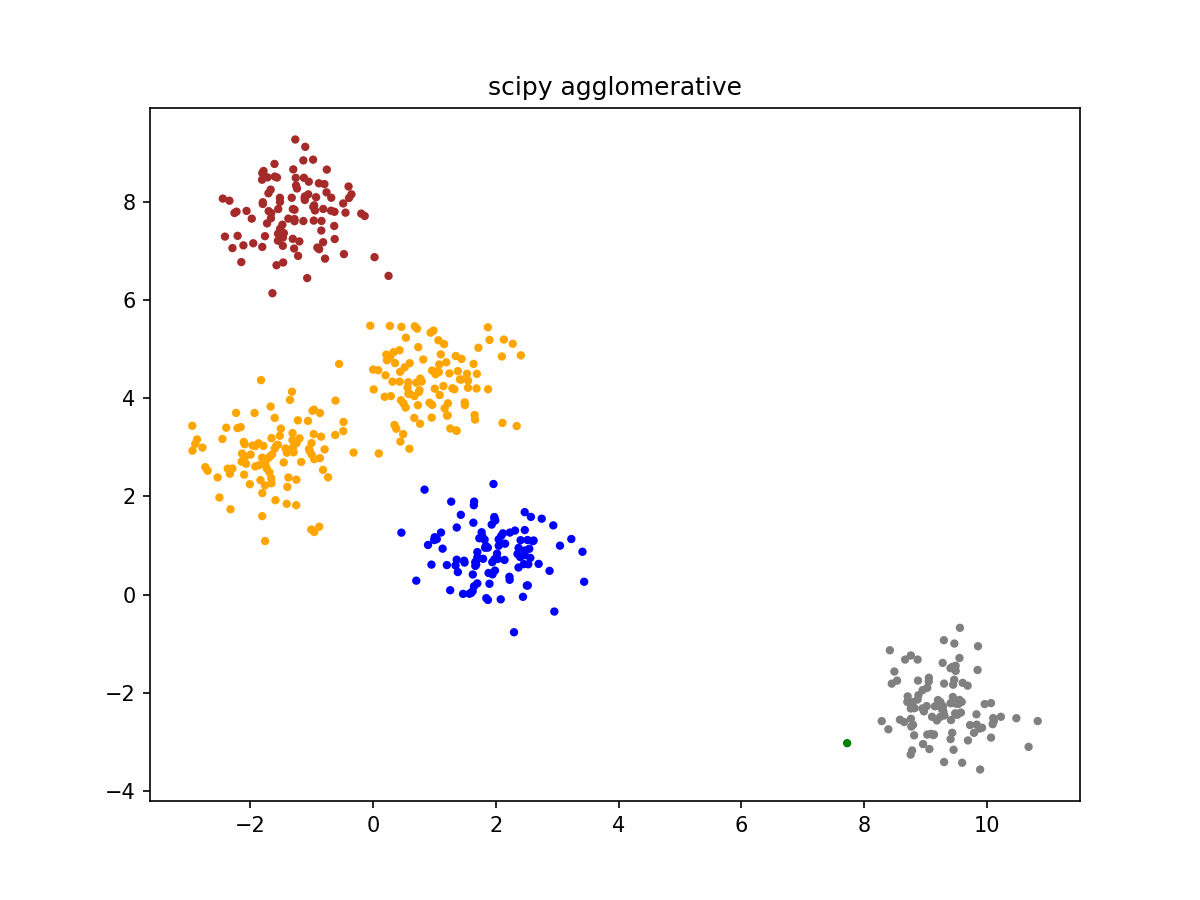

Text(0.5, 1.0, 'scipy agglomerative')

In [73]:
plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('scipy agglomerative')

#### Dendrogram

100%|██████████████████████████████████████████████████████████████████████| 124750/124750 [00:00<00:00, 151426.94it/s]


<IPython.core.display.Javascript object>


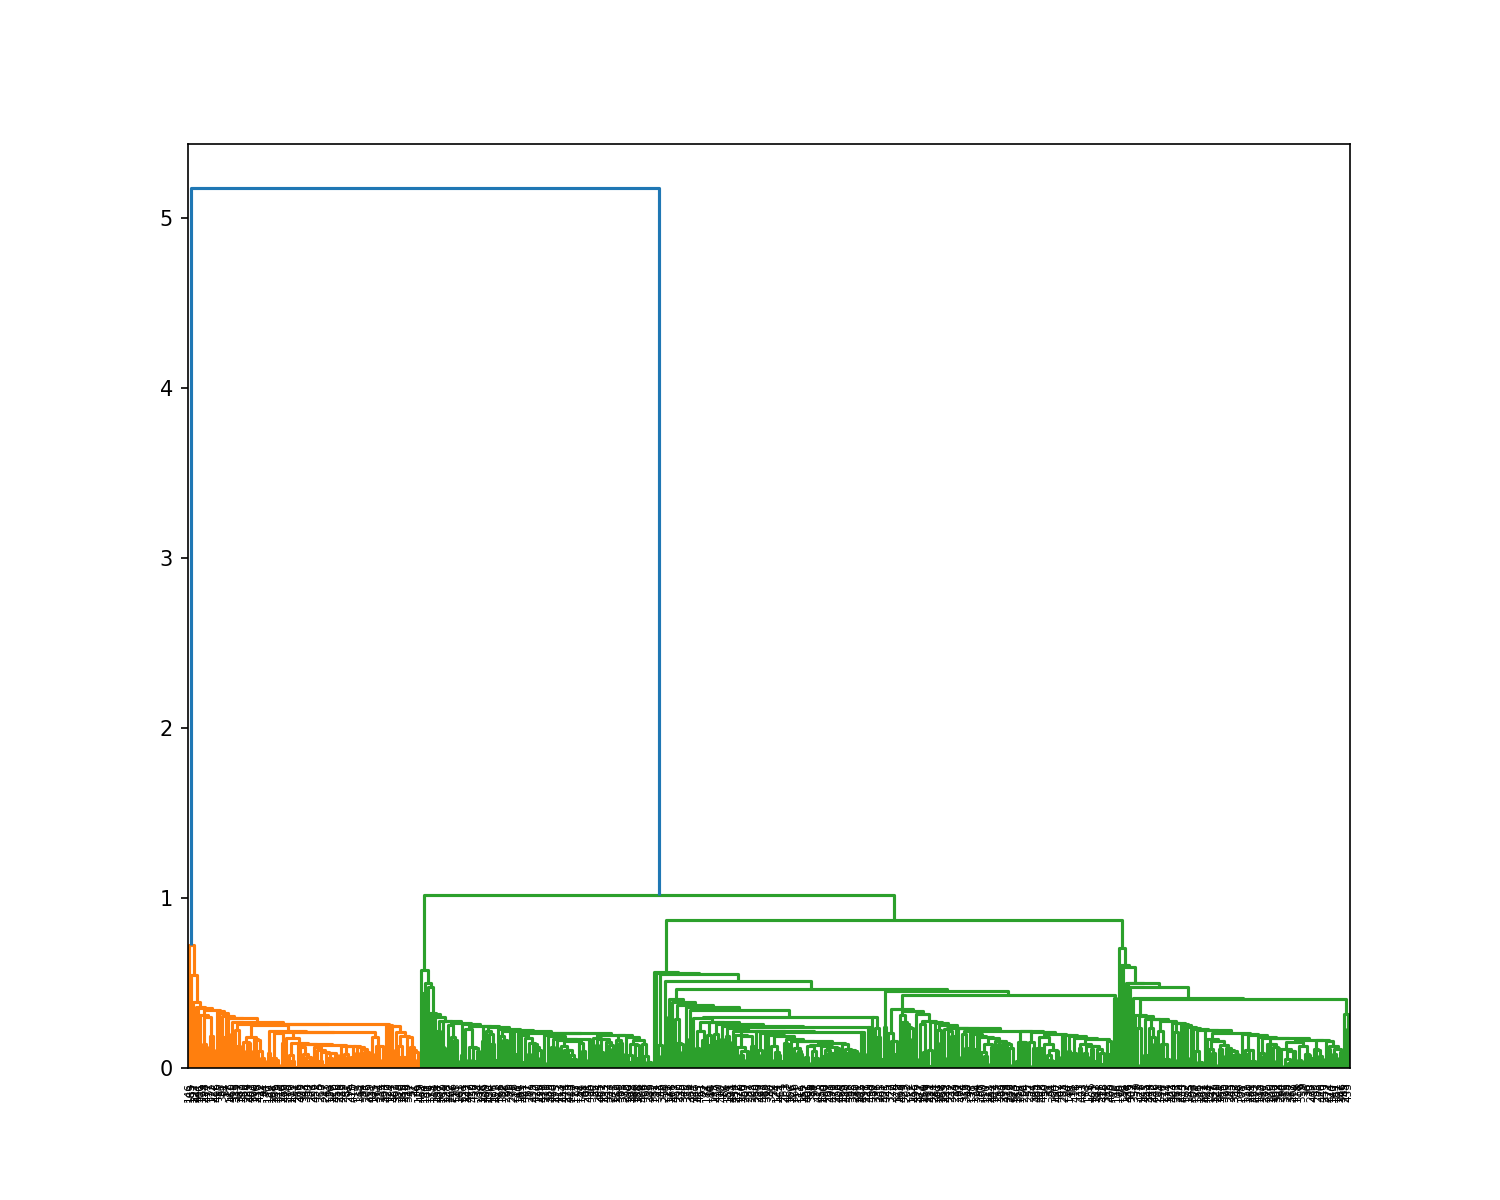

{'icoord': [[75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [72.5, 72.5, 102.5, 102.5],
  [55.0, 55.0, 87.5, 87.5],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [295.0, 295.0, 313.75, 313.75],
  [285.0, 285.0, 304.375, 304.375],
  [251.25, 251.25, 294.6875, 294.6875],
  [345.0, 345.0, 355.0, 355.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390.0, 390.0],
  [365.0, 365.0, 382.5, 382.5],
  [405.0, 405.0, 415.0, 415.0],
  [373.75, 373.75, 410.0, 410.0],
  [455.0, 455.0, 465.0, 465.0],
  [445.0, 445.0, 460.0, 460.0],
  [435.0, 435.0, 452.5, 452.5],
  [505.0, 505.0, 515.0, 515.0],
  [525.0, 525.0, 535.0, 535.0]

In [78]:
test_points = np.array(list((zip(X[:,0], X[:,1]))))
condensed_matrix_test = calc_condensed_matrix(test_points)
linkage_matrix_test = single(condensed_matrix_test)
plt.figure(figsize=(10,8))
dendrogram(linkage_matrix_test)

#### DBSCAN (density-based spatial clustering of applications with noise)

In [79]:
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#### Sample 1: dbscan for make_blobs

<IPython.core.display.Javascript object>


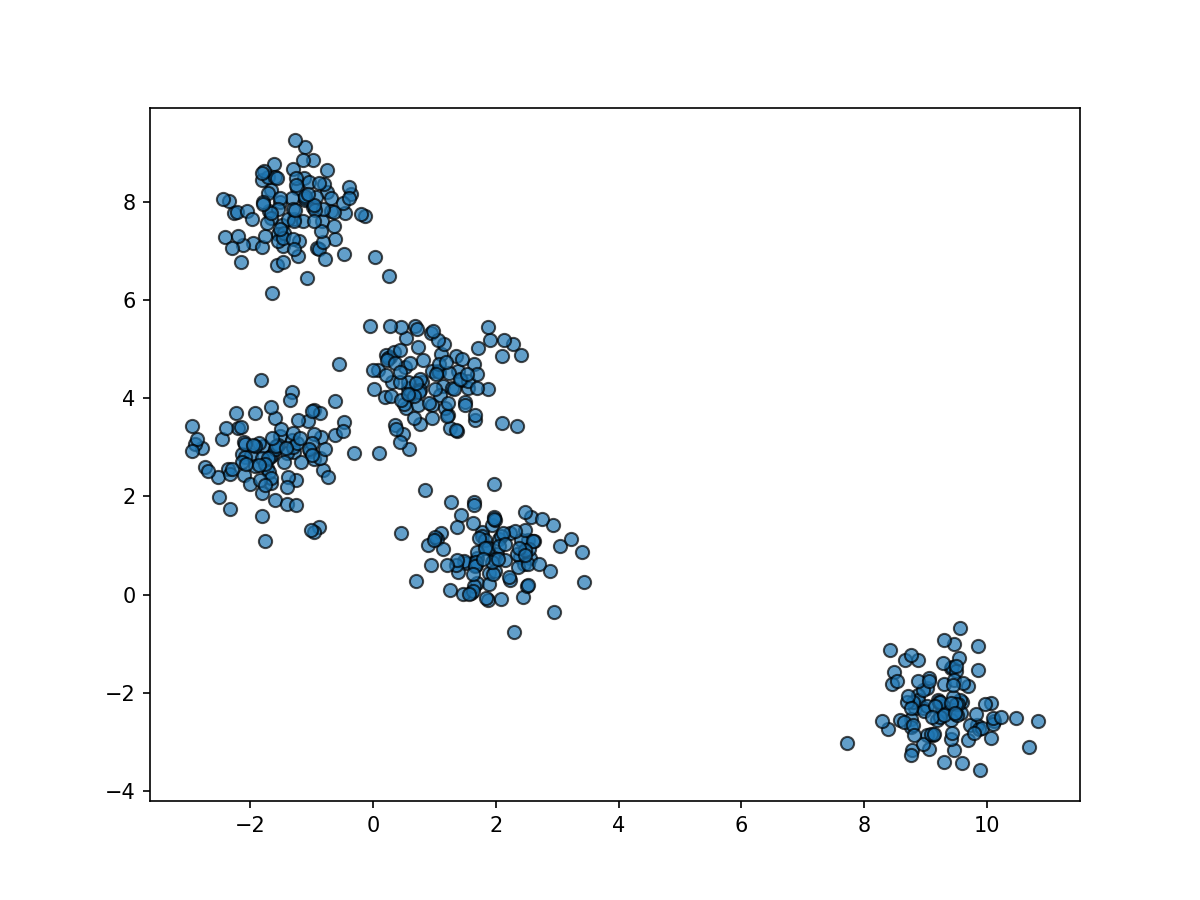

In [80]:
points,_ = make_blobs(n_samples = 500, n_features = 2, centers = 5, cluster_std = 0.6, random_state = 0)
plt.figure(figsize=(8,6))
plt.scatter(points[:,0], points[:,1], s=40, edgecolor = 'black', label='negative', alpha = 0.7)

In [98]:
def apply_db_scan(points, eps):
    dbscan = DBSCAN(eps=eps, min_samples=2, ).fit(points) # default eps=0.5, min_samples=5
    # dbscan = DBSCAN(min_samples=6).fit(points)
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted))
    print ('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

    predicted[np.where(predicted)] = n_clusters_and_noice
    return predicted 

predicted  =  apply_db_scan(points, eps=1.6) #  1.6 (5) # 1.7(3) # 1.65 (4but...) # 1.5 (8 looks good)
print (predicted)

n_clusters_and_noice =2

[0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 2 0 0 0 0 0 0 0 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0
 2 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2
 0 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0
 0 0 2 0 0 0 2 0 0 0 2 2 0 2 2 0 0 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 0 0 0 0
 0 0 0 2 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0


<IPython.core.display.Javascript object>


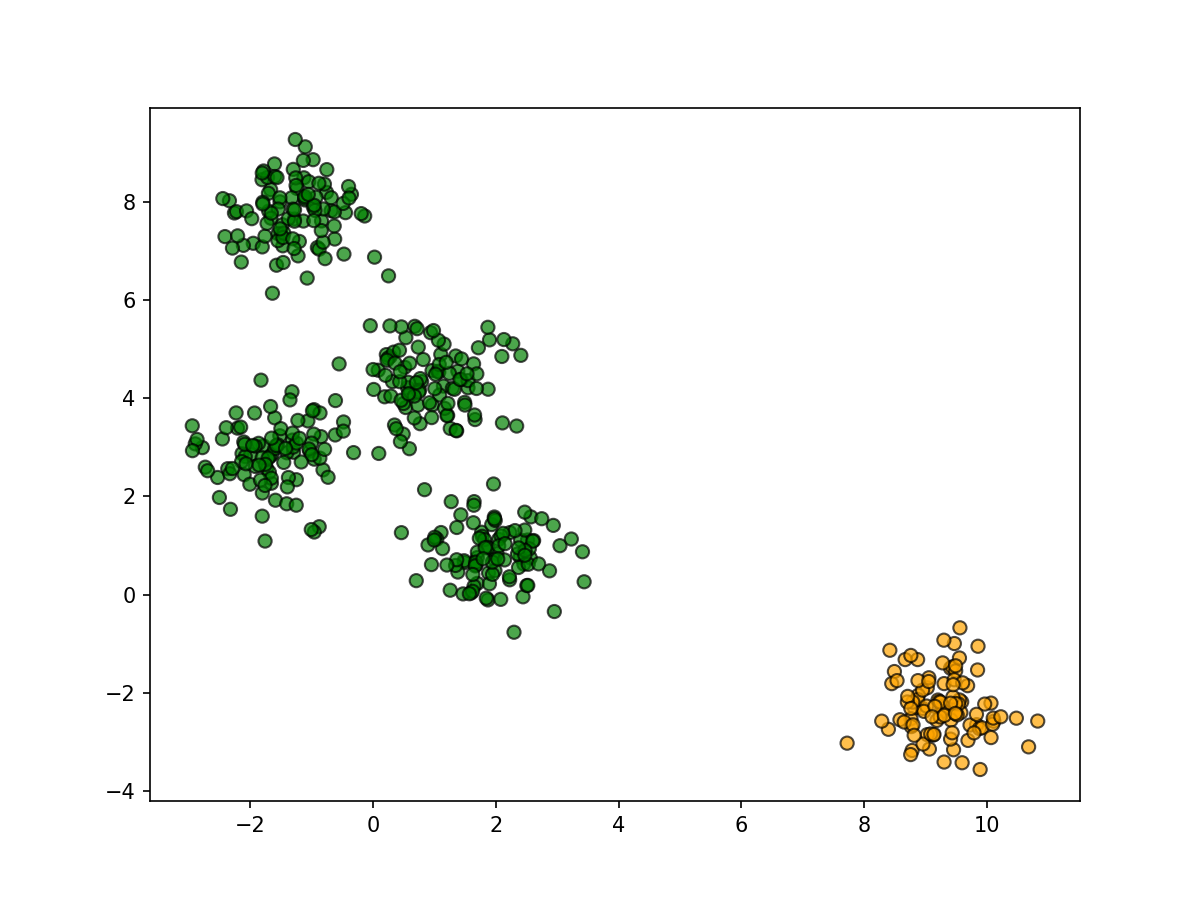

In [99]:
plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'blue', 'yellow'])
colors= np.r_[colors, np.array(['black']*100)]

plt.scatter(points[:,0], points[:,1], c= colors[predicted], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)    



<IPython.core.display.Javascript object>


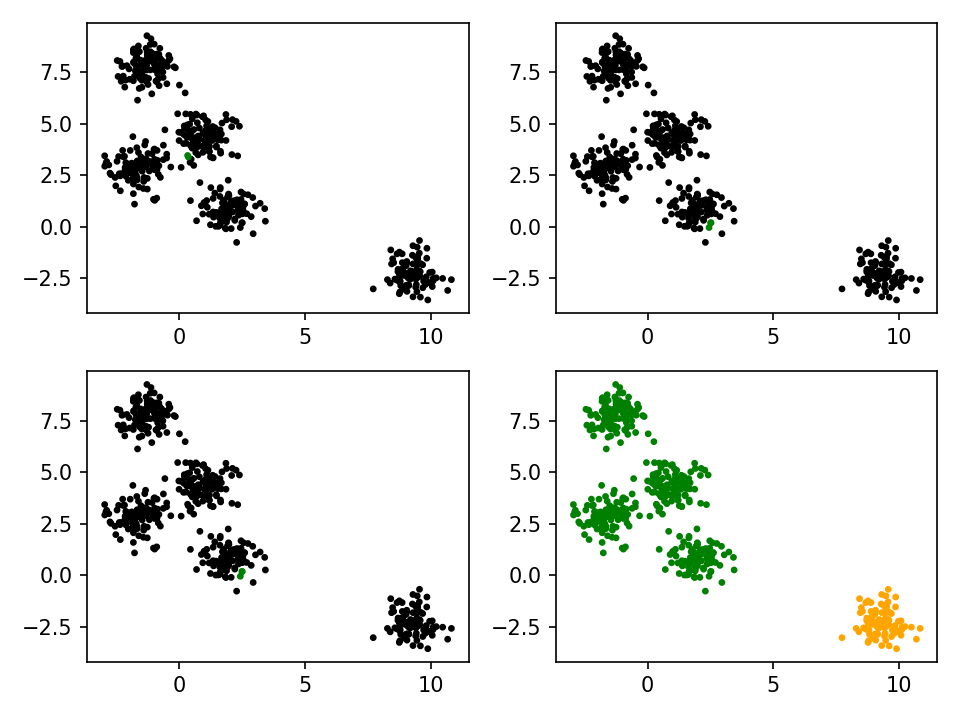

n_clusters_and_noice =89

n_clusters_and_noice =30

n_clusters_and_noice =16

n_clusters_and_noice =2



In [100]:
points = np.array(list((zip(X[:,0], X[:,1]))))
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axes = (ax1, ax2, ax3, ax4)
 
for i, eps in enumerate([0.1, 0.26, 0.3, 1.4]):    
    predicted  =  apply_db_scan(points, eps=eps)

    colors=  np.array(['green','grey', 'orange', 'blue', 'yellow'])
    colors= np.r_[colors, np.array(['black']*100)]
    axes[i].scatter(points[:,0], points[:,1], c= colors[predicted], s= 5)    

plt.tight_layout()

Sample 3: more params of dbscan

<IPython.core.display.Javascript object>


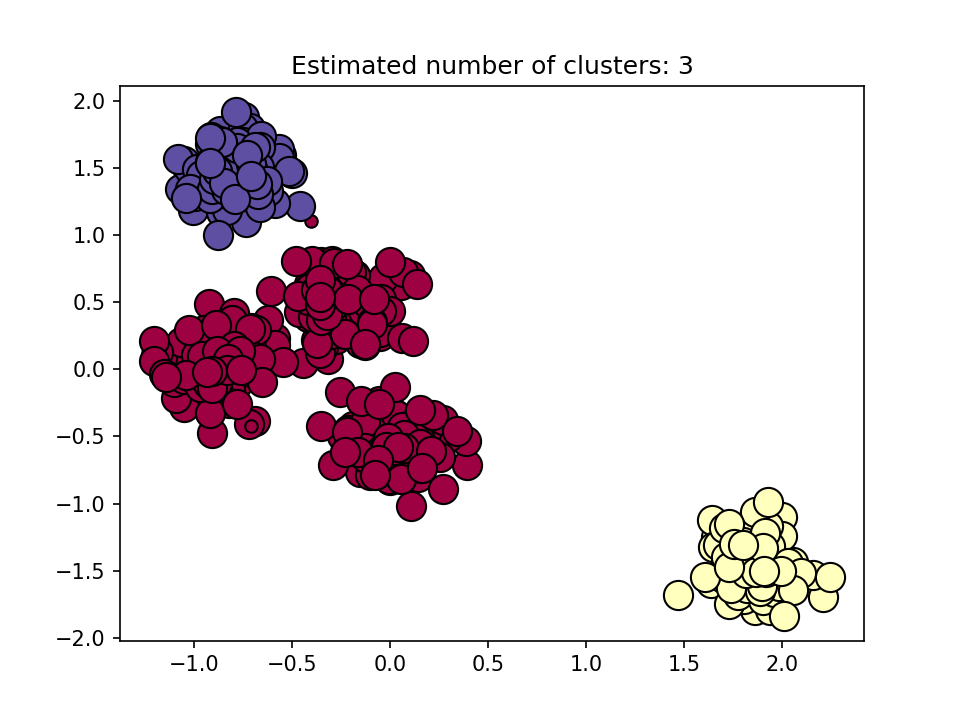

Estimated number of clusters: 3
Estimated number of noise points: 0


Text(0.5, 1.0, 'Estimated number of clusters: 3')

In [101]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


plt.figure()

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples = 500, n_features = 2, centers = 5, cluster_std = 0.6, random_state = 0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)